In [1]:
import pandas as pd

#import files
file1 = r"C:\Users\tyler\Desktop\Personal Scripts\A_E_proj\20_21.csv"
file2 = r"C:\Users\tyler\Desktop\Personal Scripts\A_E_proj\21_22.csv"
file3 = r"C:\Users\tyler\Desktop\Personal Scripts\A_E_proj\22_23.csv"

#combining csv in to one data frame
df20_21 = pd.read_csv(file1)
df21_22 = pd.read_csv(file2)
df22_23 = pd.read_csv(file3)

#dataframe clean up
AE_20_23_df = pd.concat([df20_21, df21_22, df22_23], ignore_index=True)
AE_20_23_df.rename(columns={"Unnamed: 4": "home/away"}, inplace=True)
AE_20_23_df.rename(columns={"Unnamed: 6": "win/loss"}, inplace=True)
AE_20_23_df["home/away"].fillna("home", inplace=True)
AE_20_23_df["home/away"].replace("@", "away", inplace=True)
AE_20_23_df["G"].fillna("inactive", inplace=True)
AE_20_23_df["FT%"].fillna("none", inplace=True)
AE_20_23_df["+/-"].fillna("none", inplace=True)

# (help from chatGPT to consolidate/test) - Update entire row to "inactive" if "G" is "inactive"
AE_20_23_df.loc[AE_20_23_df['G'] == 'inactive'] = 'inactive'



display(AE_20_23_df)


,G,Date,Age,Tm,home/away,Opp,win/loss,GS,MP,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1.0,12/23/2020,19-140,MIN,home,DET,W (+10),0,25:09:00,5.0,...,2.0,4.0,4.0,0.0,0.0,1.0,1.0,15.0,12.0,4.0
1,2.0,12/26/2020,19-143,MIN,away,UTA,W (+5),0,22:20,8.0,...,1.0,1.0,1.0,2.0,0.0,0.0,4.0,18.0,14.2,6.0
2,3.0,12/27/2020,19-144,MIN,away,LAL,L (-36),0,28:32:00,6.0,...,2.0,4.0,2.0,1.0,0.0,1.0,2.0,15.0,5.3,-14.0
3,4.0,12/29/2020,19-146,MIN,away,LAC,L (-23),0,24:42:00,4.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,12.0,6.9,-21.0
4,5.0,1/1/2021,19-149,MIN,home,WAS,L (-21),0,26:21:00,7.0,...,3.0,3.0,2.0,0.0,1.0,3.0,2.0,17.0,6.6,-7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,75.0,3/31/2023,21-238,MIN,home,LAL,L (-12),1,38:12:00,4.0,...,4.0,4.0,3.0,1.0,0.0,3.0,1.0,11.0,1.9,none
232,76.0,4/2/2023,21-240,MIN,home,POR,L (-2),1,37:35:00,15.0,...,5.0,5.0,6.0,1.0,0.0,4.0,1.0,37.0,23.9,-1.0
233,77.0,4/4/2023,21-242,MIN,away,BRK,W (+5),1,31:00:00,7.0,...,4.0,5.0,3.0,1.0,2.0,2.0,1.0,23.0,17.2,13.0
234,78.0,4/8/2023,21-246,MIN,away,SAS,W (+20),1,24:38:00,13.0,...,3.0,5.0,3.0,2.0,0.0,0.0,1.0,33.0,26.3,15.0


In [2]:
#null counts for data clean up - yayyy!!!
nan_counts = AE_20_23_df.isna().sum()
print(nan_counts)

G            0
Date         0
Age          0
Tm           0
home/away    0
Opp          0
win/loss     0
GS           0
MP           0
FG           0
FGA          0
FG%          0
3P           0
3PA          0
3P%          0
FT           0
FTA          0
FT%          0
ORB          0
DRB          0
TRB          0
AST          0
STL          0
BLK          0
TOV          0
PF           0
PTS          0
GmSc         0
+/-          0
dtype: int64


In [3]:
inactive = AE_20_23_df[AE_20_23_df['G'] == 'inactive']
AE_20_23_df = AE_20_23_df[AE_20_23_df['G'] != 'inactive']

# much cleaner - sweeps floor while whistling
print("Updated DataFrame:")
print(AE_20_23_df)
print("\nInactive DataFrame:")
print(inactive)

Updated DataFrame:
        G        Date     Age   Tm home/away  Opp win/loss GS        MP    FG  \
0     1.0  12/23/2020  19-140  MIN      home  DET  W (+10)  0  25:09:00   5.0   
1     2.0  12/26/2020  19-143  MIN      away  UTA   W (+5)  0     22:20   8.0   
2     3.0  12/27/2020  19-144  MIN      away  LAL  L (-36)  0  28:32:00   6.0   
3     4.0  12/29/2020  19-146  MIN      away  LAC  L (-23)  0  24:42:00   4.0   
4     5.0    1/1/2021  19-149  MIN      home  WAS  L (-21)  0  26:21:00   7.0   
..    ...         ...     ...  ...       ...  ...      ... ..       ...   ...   
231  75.0   3/31/2023  21-238  MIN      home  LAL  L (-12)  1  38:12:00   4.0   
232  76.0    4/2/2023  21-240  MIN      home  POR   L (-2)  1  37:35:00  15.0   
233  77.0    4/4/2023  21-242  MIN      away  BRK   W (+5)  1  31:00:00   7.0   
234  78.0    4/8/2023  21-246  MIN      away  SAS  W (+20)  1  24:38:00  13.0   
235  79.0    4/9/2023  21-247  MIN      home  NOP   W (+5)  1  39:05:00   8.0   

     ...

In [4]:
#needed to add this

AE_20_23_df["Date"] = pd.to_datetime(AE_20_23_df["Date"])
AE_20_23_df["year"] = AE_20_23_df["Date"].dt.year

AE_20_23_df["year"] = AE_20_23_df["Date"].dt.year

In [5]:
print(AE_20_23_df.dtypes)

G                    object
Date         datetime64[ns]
Age                  object
Tm                   object
home/away            object
Opp                  object
win/loss             object
GS                   object
MP                   object
FG                   object
FGA                  object
FG%                  object
3P                   object
3PA                  object
3P%                  object
FT                   object
FTA                  object
FT%                  object
ORB                  object
DRB                  object
TRB                  object
AST                  object
STL                  object
BLK                  object
TOV                  object
PF                   object
PTS                  object
GmSc                 object
+/-                  object
year                  int64
dtype: object


In [6]:
#lets see some averages -- ding ding, checks out with https://www.basketball-reference.com/players/e/edwaran01.html
column_averages = AE_20_23_df.mean().round(1)

print(column_averages)

G         37.7
FG         7.9
FGA       17.9
FG%        0.4
3P         2.7
3PA        7.6
3P%        0.3
FT         3.4
FTA        4.4
ORB        0.8
DRB        4.3
TRB        5.1
AST        3.7
STL        1.4
BLK        0.6
TOV        2.7
PF         2.1
PTS       21.8
GmSc      14.8
year    2021.7
dtype: float64


C:\Users\tyler\AppData\Local\Temp\ipykernel_38488\4172900309.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  column_averages = AE_20_23_df.mean().round(1)
C:\Users\tyler\AppData\Local\Temp\ipykernel_38488\4172900309.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  column_averages = AE_20_23_df.mean().round(1)


In [27]:
average_plus_minus = AE_20_23_df['+/-'].mean().round(1)

print("Average for column '+/-':", average_plus_minus)

Average for column '+/-': 0.3


In [7]:
#lets see by opponent
averages_by_opp = AE_20_23_df.groupby("Opp").mean().round(1)

display(averages_by_opp)

C:\Users\tyler\AppData\Local\Temp\ipykernel_38488\773920903.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  averages_by_opp = AE_20_23_df.groupby("Opp").mean().round(1)


,year
Opp,
ATL,2021.6
BOS,2021.8
BRK,2021.8
CHI,2021.8
CHO,2021.7
CLE,2021.7
DAL,2021.8
DEN,2021.9
DET,2021.7


In [8]:
#lets see by home or away
averages_by_ha = AE_20_23_df.groupby("home/away").mean().round(1)

display(averages_by_ha)

C:\Users\tyler\AppData\Local\Temp\ipykernel_38488\3102169222.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  averages_by_ha = AE_20_23_df.groupby("home/away").mean().round(1)


,year
home/away,
away,2021.7
home,2021.7


In [9]:
#lets test ourselves and see both - needed to pass as a list when combining
averages_by_oppha = AE_20_23_df.groupby(["home/away", "Opp"]).mean().round(1)
display(averages_by_oppha)

C:\Users\tyler\AppData\Local\Temp\ipykernel_38488\2872904754.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  averages_by_oppha = AE_20_23_df.groupby(["home/away", "Opp"]).mean().round(1)


year
home/away Opp        
away      ATL  2022.0
          BOS  2021.7
          BRK  2021.7
          CHI  2022.0
          CHO  2021.3
          CLE  2021.7
          DAL  2022.0
          DEN  2022.0
          DET  2022.0
          GSW  2021.8
          HOU  2022.2
          IND  2021.7
          LAC  2021.5
          LAL  2021.4
          MEM  2021.8
          MIA  2021.7
          MIL  2021.3
          NOP  2021.8
          NYK  2021.5
          OKC  2021.6
          ORL  2021.7
          PHI  2021.3
          PHO  2021.8
          POR  2021.6
          SAC  2022.0
          SAS  2022.0
          TOR  2021.5
          UTA  2021.4
          WAS  2021.3
home      ATL  2021.0
          BOS  2022.0
          BRK  2022.0
          CHI  2021.7
          CHO  2022.0
          CLE  2021.7
          DAL  2021.6
          DEN  2021.8
          DET  2021.3
          GSW  2022.0
          HOU  2021.6
          IND  2021.3
          LAC  2021.5
          LAL  2022.0
          MEM  2021.7
          MIA  2021.3
          MIL  2021.7
          NOP  2021.4
          NYK  2021.5
          OKC  2021.8
          ORL  2021.7
          PHI  2022.0
          PHO  2021.8
          POR  2022.0
          SAC  2022.0
          SAS  2021.5
          TOR  2022.0
          UTA  2021.8
          WAS  2022.0

In [10]:
# Filter games where PTS > 18.8 and Result is "W"
filtered_games = AE_20_23_df[(AE_20_23_df["PTS"] > 18.8) & (AE_20_23_df["G"] == "W")]

# Calculate the percentage
percentage = len(filtered_games) / len(AE_20_23_df) * 100

print(f"The percentage of games with PTS > 18.8 and Result as 'W' is: {percentage}%")

The percentage of games with PTS > 18.8 and Result as 'W' is: 0.0%


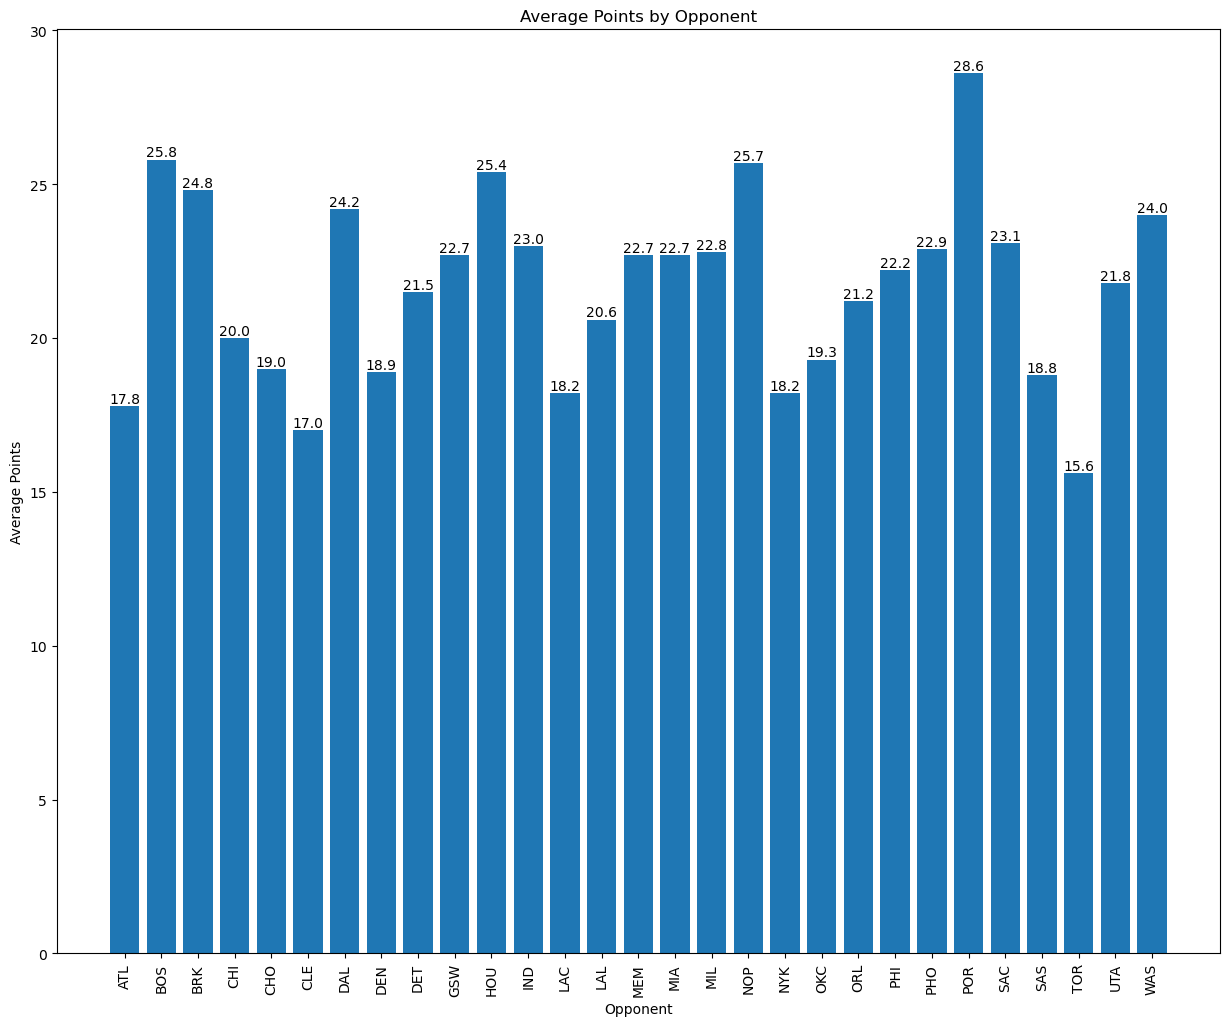

In [11]:
#needed help from chatgpt but got it - numbers check out with Google - YAY
import matplotlib.pyplot as plt


averages_by_opp = AE_20_23_df.groupby("Opp")["PTS"].mean().round(1)


averages_by_opp = averages_by_opp.reset_index()


plt.figure(figsize=(15, 12))
bars = plt.bar(averages_by_opp["Opp"], averages_by_opp["PTS"])
plt.xlabel("Opponent")
plt.ylabel("Average Points")
plt.title("Average Points by Opponent")
plt.xticks(rotation=90)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height}', ha='center', va='bottom')

plt.show()

Available Opponents:
1. DET
2. UTA
3. LAL
4. LAC
5. WAS
6. DEN
7. POR
8. SAS
9. MEM
10. ATL
11. ORL
12. NOP
13. GSW
14. PHI
15. CLE
16. OKC
17. DAL
18. CHO
19. TOR
20. IND
21. NYK
22. MIL
23. CHI
24. PHO
25. HOU
26. BRK
27. SAC
28. BOS
29. MIA
Enter the opponent number: 8


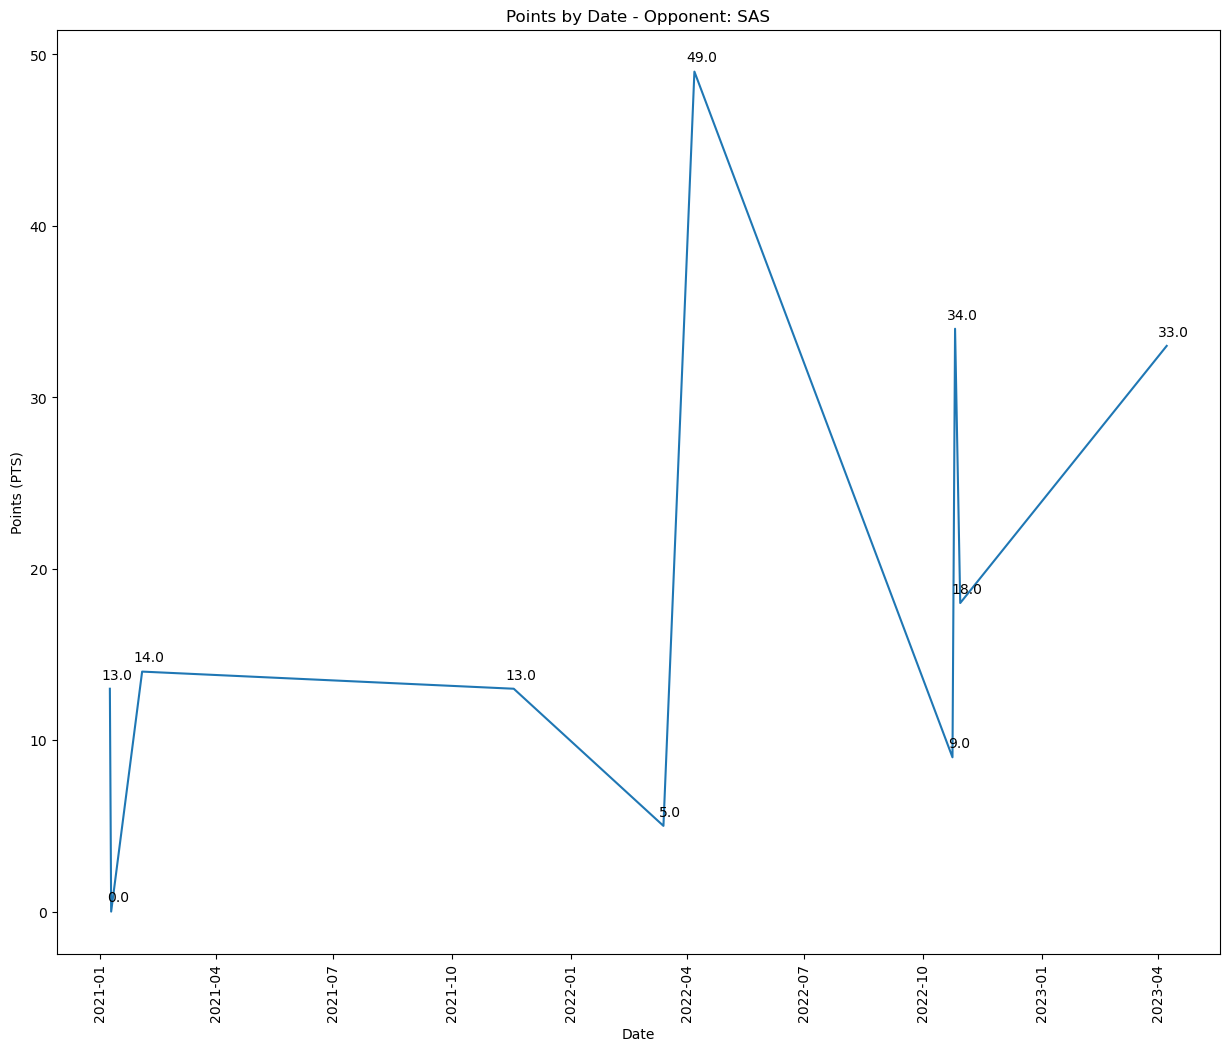

In [12]:
#needed some more chatGPT help but kind of cool

opponents = AE_20_23_df["Opp"].unique()

print("Available Opponents:")
for i, opponent in enumerate(opponents, start=1):
    print(f"{i}. {opponent}")


selection = int(input("Enter the opponent number: "))
selected_opponent = opponents[selection - 1]


opponent_data = AE_20_23_df[AE_20_23_df["Opp"] == selected_opponent]
opponent_data = opponent_data.sort_values("Date")

plt.figure(figsize=(15, 12))


plt.plot(opponent_data["Date"], opponent_data["PTS"])

plt.xlabel("Date")
plt.ylabel("Points (PTS)")
plt.title(f"Points by Date - Opponent: {selected_opponent}")
plt.xticks(rotation=90)

for i in range(len(opponent_data)):
    plt.annotate(str(opponent_data.iloc[i]["PTS"]),
                 xy=(opponent_data.iloc[i]["Date"], opponent_data.iloc[i]["PTS"]),
                 xytext=(5, 5),
                 textcoords="offset points",
                 ha='center',
                 va='bottom')


plt.show()


Available Opponents:
1. DET
2. UTA
3. LAL
4. LAC
5. WAS
6. DEN
7. POR
8. SAS
9. MEM
10. ATL
11. ORL
12. NOP
13. GSW
14. PHI
15. CLE
16. OKC
17. DAL
18. CHO
19. TOR
20. IND
21. NYK
22. MIL
23. CHI
24. PHO
25. HOU
26. BRK
27. SAC
28. BOS
29. MIA
Enter the opponent number: 8


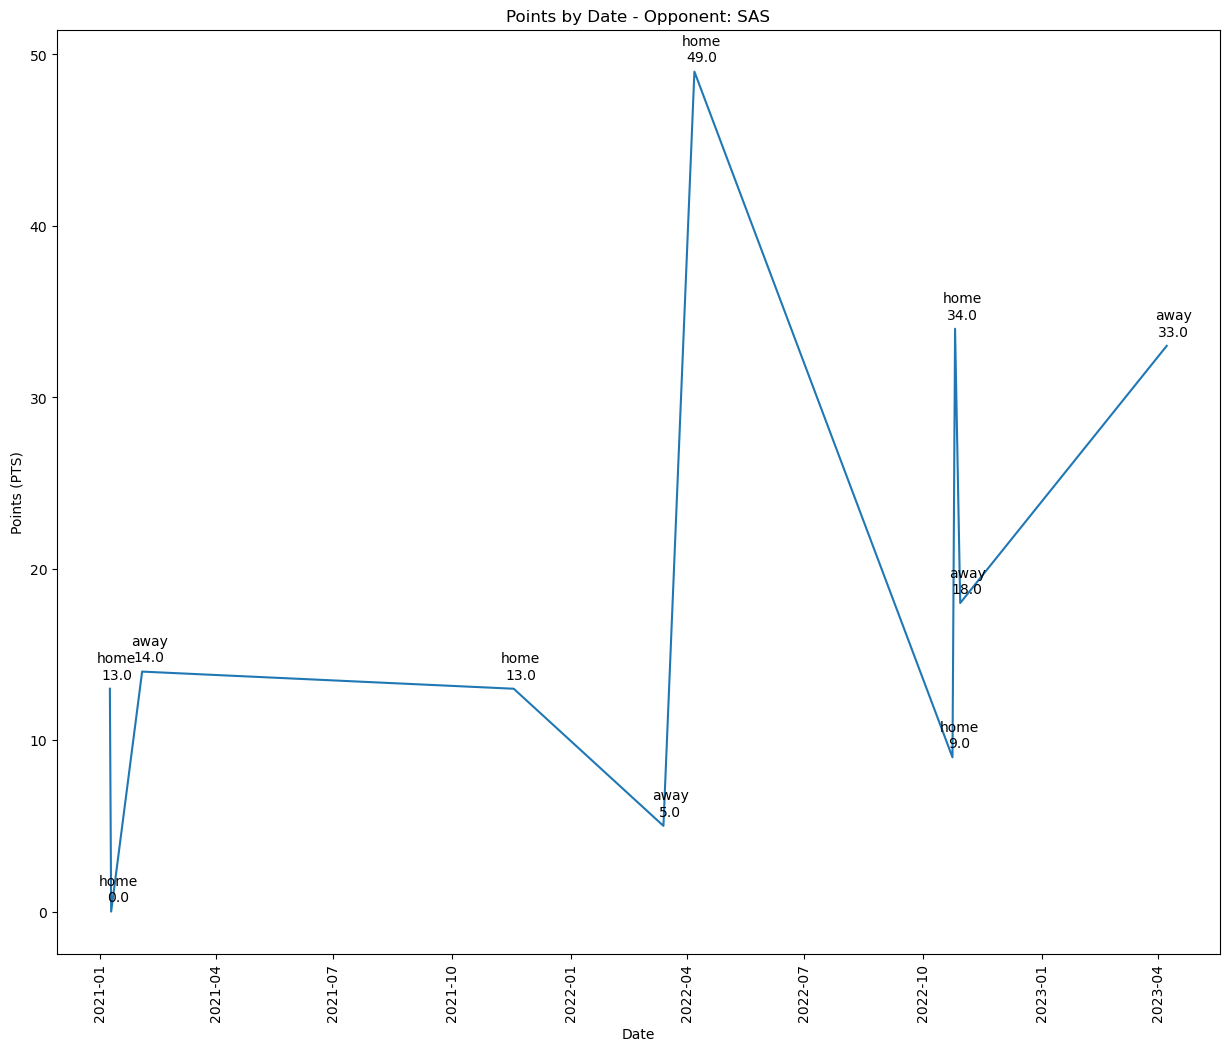

In [13]:
#practicing on my own to look at home/away, no help from chatgpt


opponents = AE_20_23_df["Opp"].unique()
print("Available Opponents:")
for i, opponent in enumerate(opponents, start=1):
    print(f"{i}. {opponent}")

# Prompt for opponent selection
selection = int(input("Enter the opponent number: "))
selected_opponent = opponents[selection - 1]
opponent_data = AE_20_23_df[AE_20_23_df["Opp"] == selected_opponent]
opponent_data = opponent_data.sort_values("Date")

plt.figure(figsize=(15, 12))
plt.plot(opponent_data["Date"], opponent_data["PTS"])

plt.xlabel("Date")
plt.ylabel("Points (PTS)")
plt.title(f"Points by Date - Opponent: {selected_opponent}")
plt.xticks(rotation=90)
for i in range(len(opponent_data)):
    label = f"{opponent_data.iloc[i]['home/away']}\n{opponent_data.iloc[i]['PTS']}"
    plt.annotate(label,
                 xy=(opponent_data.iloc[i]["Date"], opponent_data.iloc[i]["PTS"]),
                 xytext=(5, 5),
                 textcoords="offset points",
                 ha='center',
                 va='bottom')

plt.show()


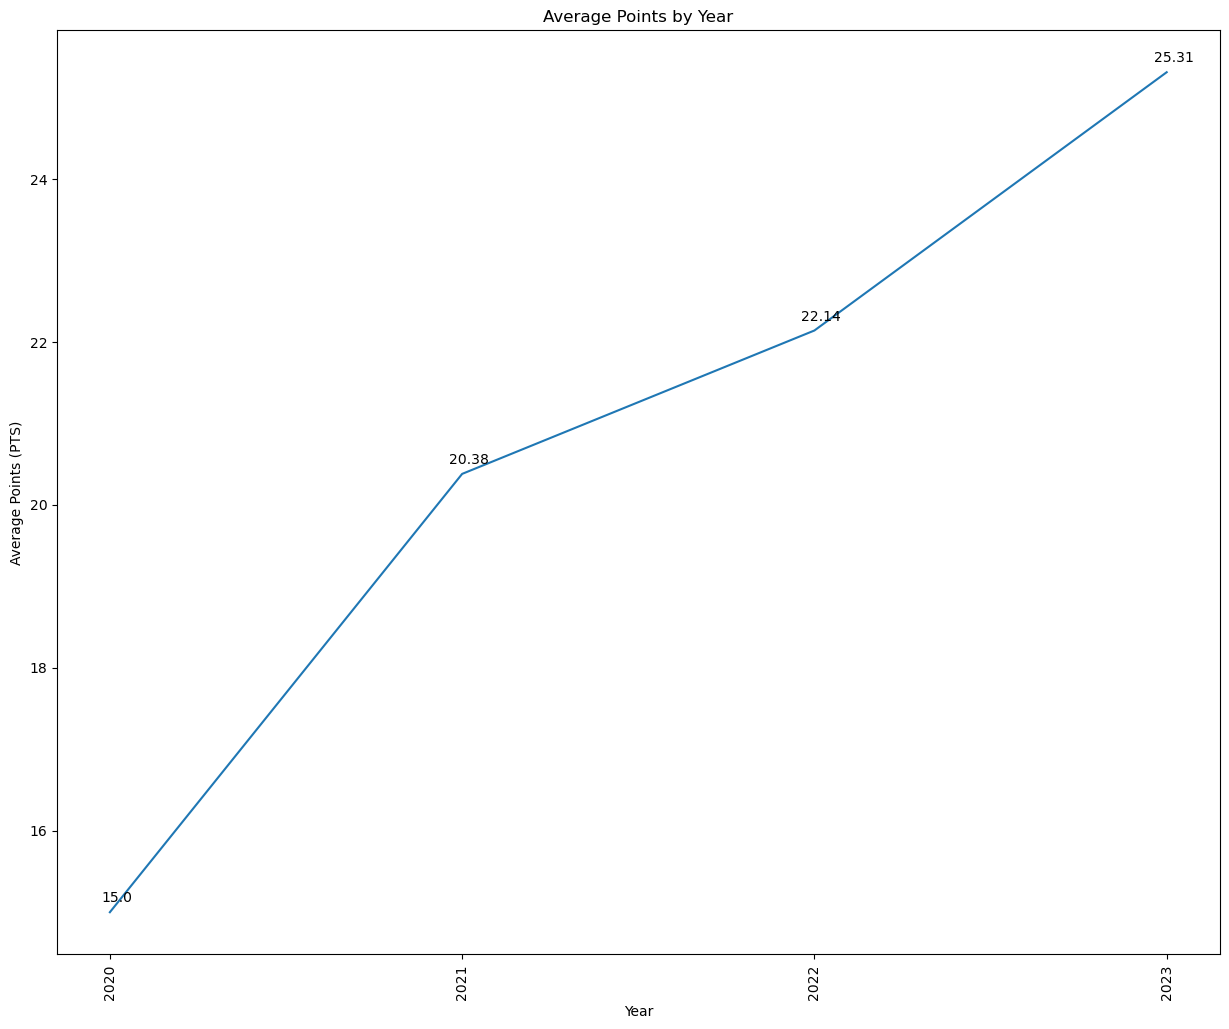

In [14]:
from matplotlib.ticker import MultipleLocator

# Group the data by year and calculate average points
yearly_data = AE_20_23_df.groupby(AE_20_23_df["Date"].dt.year)["PTS"].mean().round(2)

# Sort the data by year
yearly_data = yearly_data.sort_index()

plt.figure(figsize=(15, 12))

plt.plot(yearly_data.index, yearly_data.values)

plt.xlabel("Year")
plt.ylabel("Average Points (PTS)")
plt.title("Average Points by Year")
plt.xticks(rotation=90)

# Set the tick locator with a step size of 1 for whole numbers on the x-axis
plt.gca().xaxis.set_major_locator(MultipleLocator(1))

for i in range(len(yearly_data)):
    plt.annotate(str(yearly_data.iloc[i]),
                 xy=(yearly_data.index[i], yearly_data.values[i]),
                 xytext=(5, 5),
                 textcoords="offset points",
                 ha='center',
                 va='bottom')

plt.show()


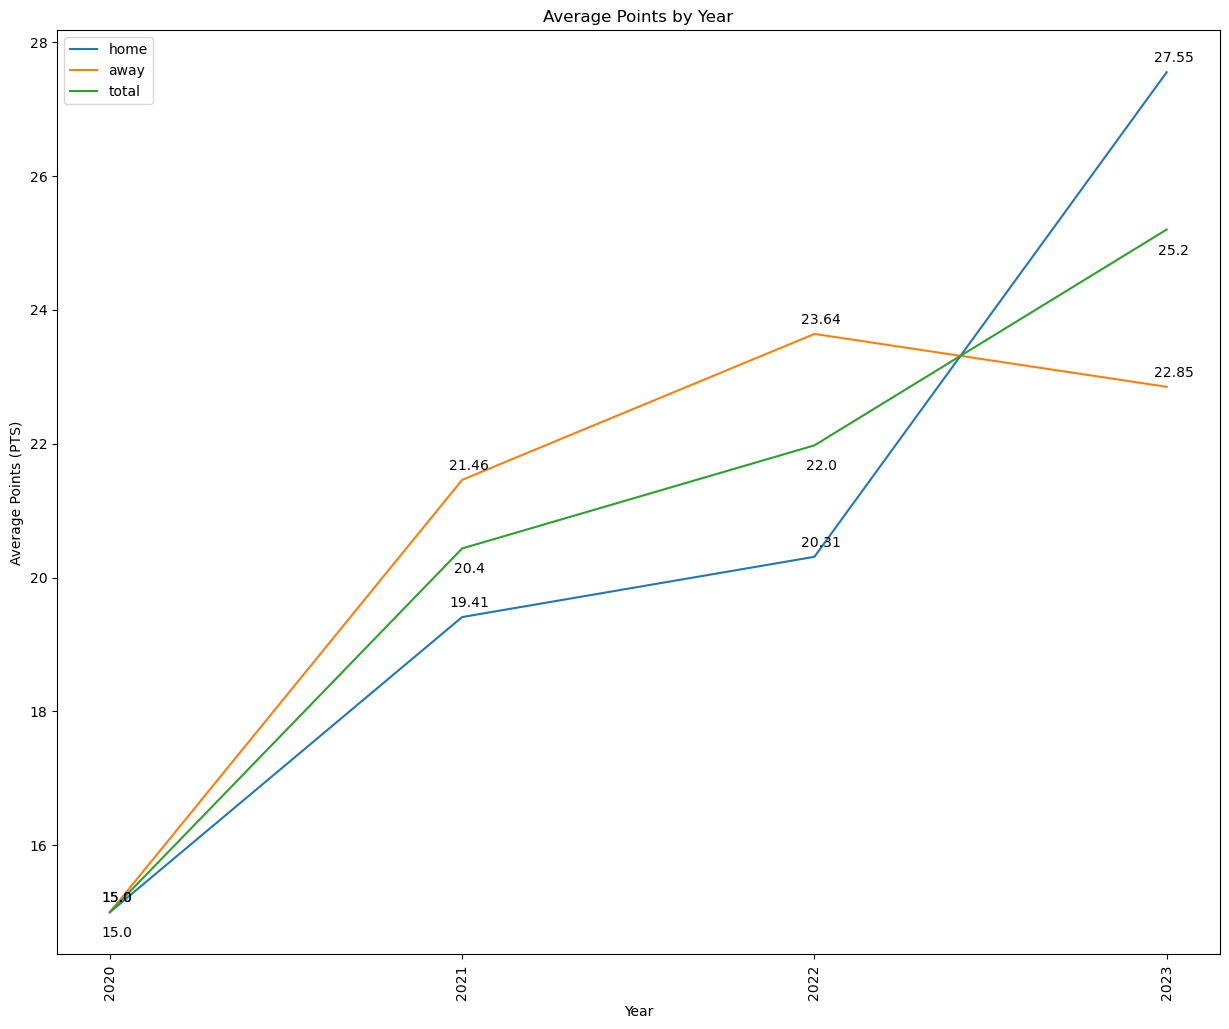

In [15]:
yearly_data = AE_20_23_df.groupby([AE_20_23_df["Date"].dt.year, AE_20_23_df["home/away"]])["PTS"].mean().round(2)
yearly_data = yearly_data.unstack()
yearly_data = yearly_data.sort_index()


yearly_data["total"] = yearly_data.mean(axis=1)

plt.figure(figsize=(15, 12))

plt.plot(yearly_data.index, yearly_data["home"], label="home")
plt.plot(yearly_data.index, yearly_data["away"], label="away")
plt.plot(yearly_data.index, yearly_data["total"], label="total")  # Add total average points

plt.xlabel("Year")
plt.ylabel("Average Points (PTS)")
plt.title("Average Points by Year")
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(MultipleLocator(1))

for i in range(len(yearly_data)):
    plt.annotate(str(yearly_data["home"].iloc[i]),
                 xy=(yearly_data.index[i], yearly_data["home"].values[i]),
                 xytext=(5, 5),
                 textcoords="offset points",
                 ha='center',
                 va='bottom')

    plt.annotate(str(yearly_data["away"].iloc[i]),
                 xy=(yearly_data.index[i], yearly_data["away"].values[i]),
                 xytext=(5, 5),
                 textcoords="offset points",
                 ha='center',
                 va='bottom')

    plt.annotate("{:.1f}".format(yearly_data["total"].iloc[i]),  # Annotate total average points with a single decimal value
                 xy=(yearly_data.index[i], yearly_data["total"].values[i]),
                 xytext=(5, -10),
                 textcoords="offset points",
                 ha='center',
                 va='top')

plt.legend()
plt.show()



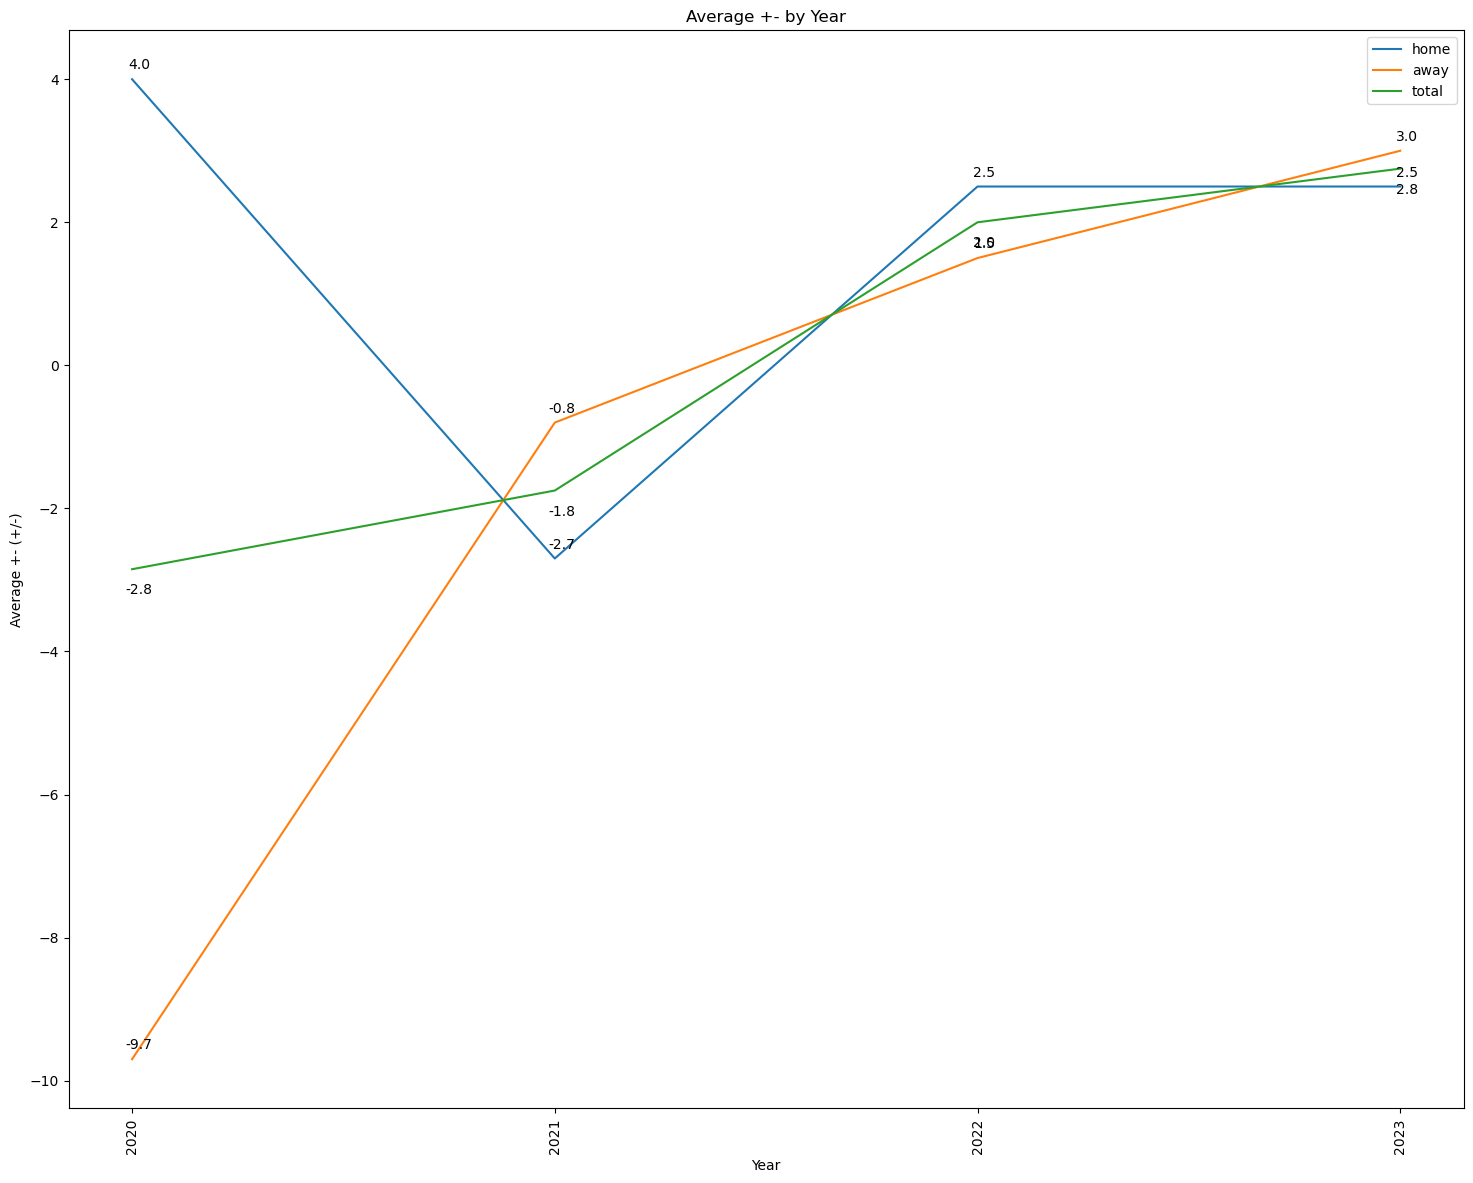

In [16]:
#testing with +/- also here, no chatgpt help

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

#did need help here
AE_20_23_df["+/-"] = pd.to_numeric(AE_20_23_df["+/-"], errors="coerce")

yearly_data = AE_20_23_df.groupby([AE_20_23_df["Date"].dt.year, AE_20_23_df["home/away"]])["+/-"].mean().round(1)
yearly_data = yearly_data.unstack()
yearly_data = yearly_data.sort_index()

yearly_data["total"] = yearly_data.mean(axis=1)

plt.figure(figsize=(18, 14))

plt.plot(yearly_data.index, yearly_data["home"], label="home")
plt.plot(yearly_data.index, yearly_data["away"], label="away")
plt.plot(yearly_data.index, yearly_data["total"], label="total") 

plt.xlabel("Year")
plt.ylabel("Average +- (+/-)")
plt.title("Average +- by Year")
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(MultipleLocator(1))

for i in range(len(yearly_data)):
    plt.annotate(str(yearly_data["home"].iloc[i]),
                 xy=(yearly_data.index[i], yearly_data["home"].values[i]),
                 xytext=(5, 5),
                 textcoords="offset points",
                 ha='center',
                 va='bottom')

    plt.annotate(str(yearly_data["away"].iloc[i]),
                 xy=(yearly_data.index[i], yearly_data["away"].values[i]),
                 xytext=(5, 5),
                 textcoords="offset points",
                 ha='center',
                 va='bottom')

    plt.annotate("{:.1f}".format(yearly_data["total"].iloc[i]), 
                 xy=(yearly_data.index[i], yearly_data["total"].values[i]),
                 xytext=(5, -10),
                 textcoords="offset points",
                 ha='center',
                 va='top')

plt.legend()
plt.show()



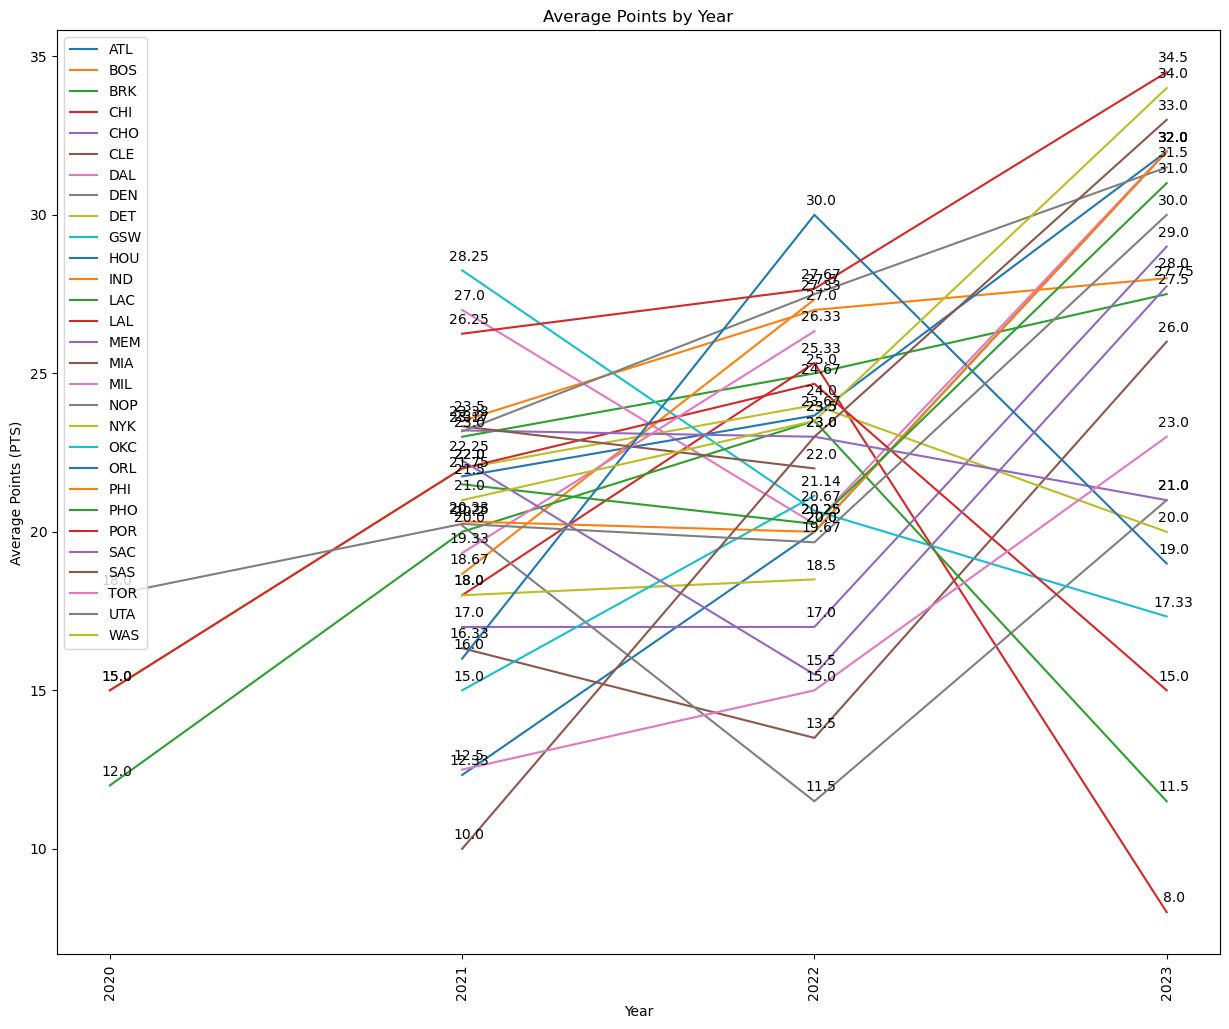

In [17]:
#not great graphs just practicing
yearly_data = AE_20_23_df.groupby([AE_20_23_df["Date"].dt.year, AE_20_23_df["Opp"]])["PTS"].mean().round(2)
yearly_data = yearly_data.unstack()
yearly_data = yearly_data.sort_index()

plt.figure(figsize=(15, 12))


for opponent in yearly_data.columns:
    plt.plot(yearly_data.index, yearly_data[opponent], label=opponent)

plt.xlabel("Year")
plt.ylabel("Average Points (PTS)")
plt.title("Average Points by Year")
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(MultipleLocator(1))

for i in range(len(yearly_data)):
    for opponent in yearly_data.columns:
        plt.annotate(str(yearly_data[opponent].iloc[i]),
                     xy=(yearly_data.index[i], yearly_data[opponent].values[i]),
                     xytext=(5, 5),
                     textcoords="offset points",
                     ha='center',
                     va='bottom')

plt.legend()
plt.show()

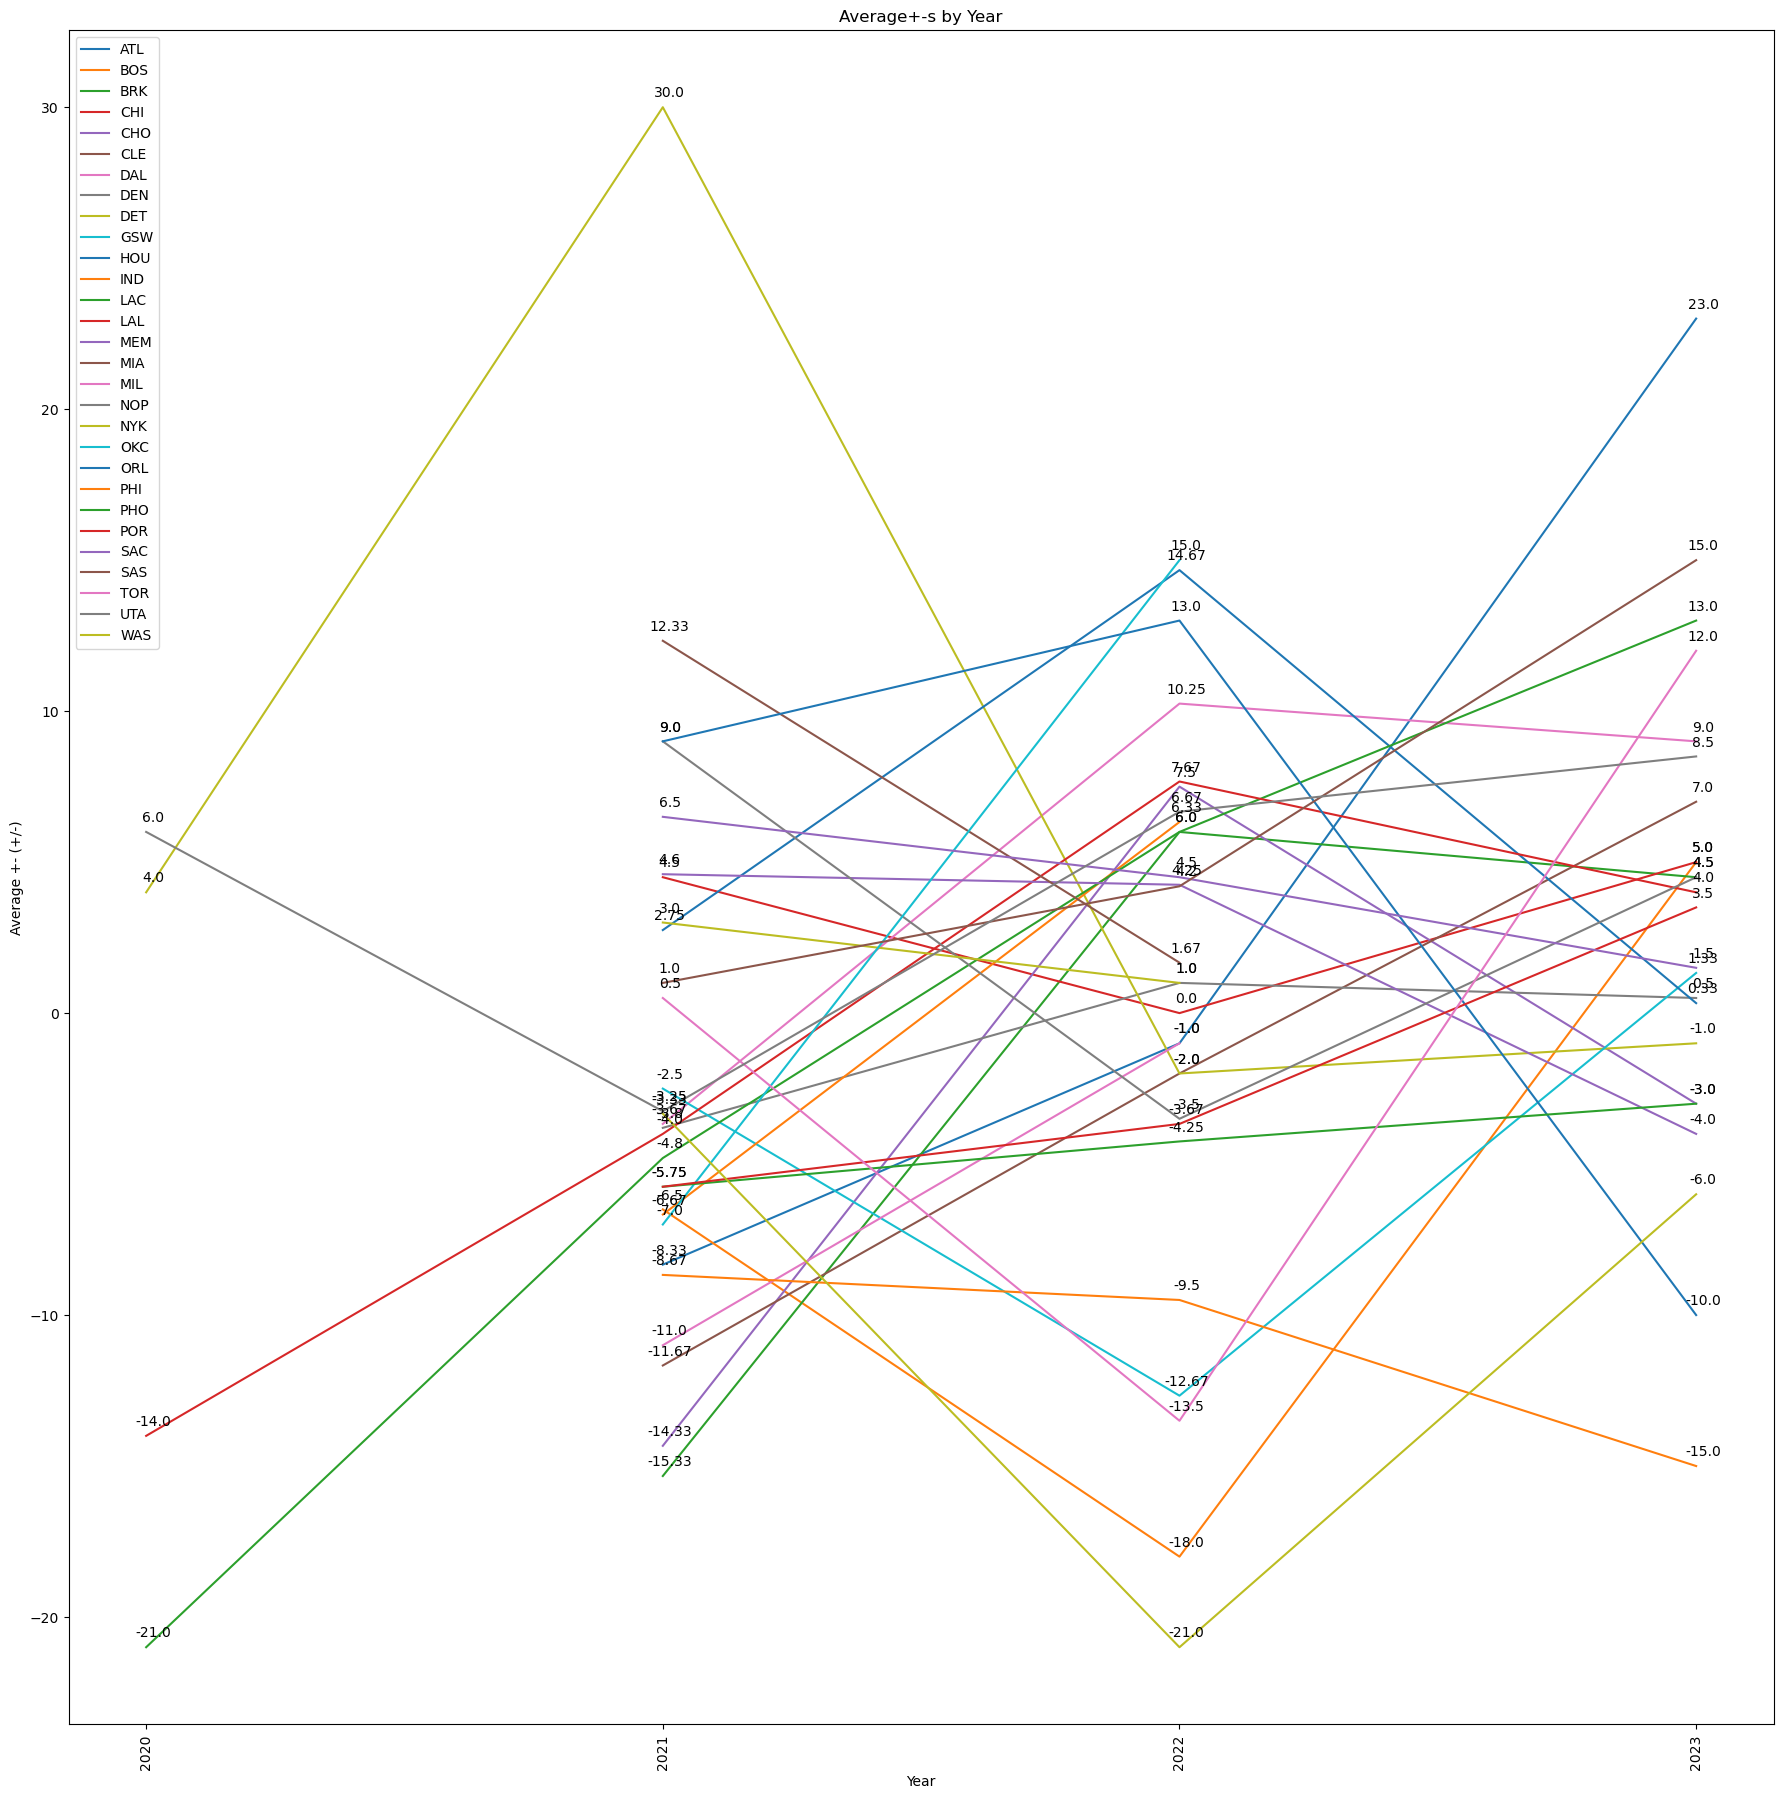

In [18]:
#not great graphs just practicing
yearly_data = AE_20_23_df.groupby([AE_20_23_df["Date"].dt.year, AE_20_23_df["Opp"]])["+/-"].mean().round(2)
yearly_data = yearly_data.unstack()
yearly_data = yearly_data.sort_index()

plt.figure(figsize=(22, 22))


for opponent in yearly_data.columns:
    plt.plot(yearly_data.index, yearly_data[opponent], label=opponent)

plt.xlabel("Year")
plt.ylabel("Average +- (+/-)")
plt.title("Average+-s by Year")
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(MultipleLocator(1))


for i in range(len(yearly_data)):
    for opponent in yearly_data.columns:
        plt.annotate(str(yearly_data[opponent].iloc[i]),
                     xy=(yearly_data.index[i], yearly_data[opponent].values[i]),
                     xytext=(5, 5),
                     textcoords="offset points",
                     ha='center',
                     va='bottom')

plt.legend()
plt.show()

Here we are going to shift to more data analysis (histograms, etc...) vs practicing random stuff


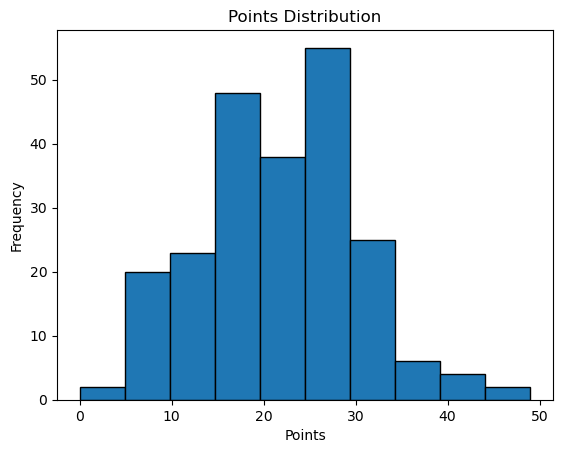

In [19]:
points = AE_20_23_df['PTS']

plt.hist(points, bins=10, edgecolor='black')
plt.title('Points Distribution')
plt.xlabel('Points')
plt.ylabel('Frequency')

plt.show()


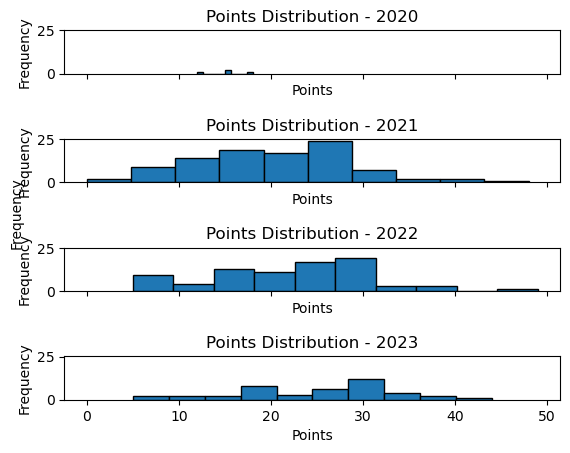

In [20]:
grouped_data = AE_20_23_df.groupby('year')
fig, axs = plt.subplots(len(grouped_data), sharex=True, sharey=True)

for i, (year, data) in enumerate(grouped_data):
    axs[i].hist(data['PTS'], bins=10, edgecolor='black')
    axs[i].set_title(f'Points Distribution - {year}')
    axs[i].set_xlabel('Points')
    axs[i].set_ylabel('Frequency')

fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical')
plt.subplots_adjust(hspace=1.5)
plt.show()


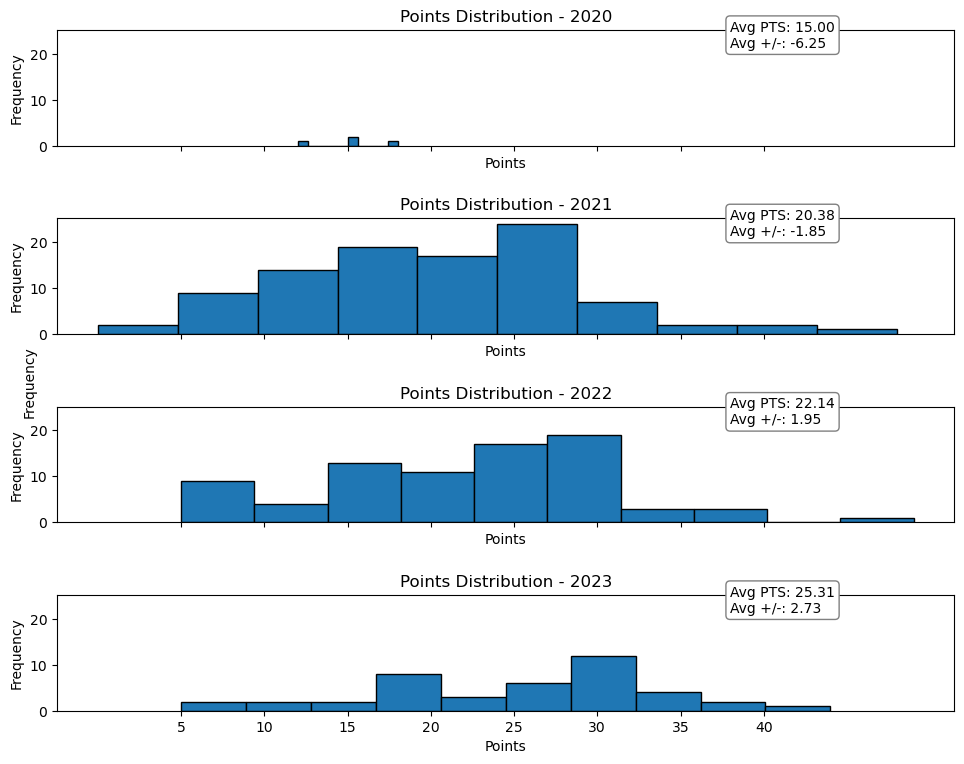

In [21]:
#got some chat GPT love here but did a lot of it at least foundationally myself

grouped_data = AE_20_23_df.groupby('year')
fig, axs = plt.subplots(len(grouped_data), figsize=(10, 8), sharex=True, sharey=True)


for i, (year, data) in enumerate(grouped_data):
    axs[i].hist(data['PTS'], bins=10, edgecolor='black')
    axs[i].set_title(f'Points Distribution - {year}')
    axs[i].set_xlabel('Points')
    axs[i].set_ylabel('Frequency')

    
    avg_pts = data['PTS'].mean()
    avg_plus_minus = data['+/-'].mean()
    axs[i].text(0.75, 0.85, f'Avg PTS: {avg_pts:.2f}\nAvg +/-: {avg_plus_minus:.2f}', transform=axs[i].transAxes, fontsize=10, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'))

    
    x_labels = range(int(data['PTS'].min()), int(data['PTS'].max()) + 1, 5)
    axs[i].set_xticks(x_labels)
    axs[i].set_xticklabels(x_labels)


fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical')


plt.subplots_adjust(hspace=0.5)
fig.tight_layout(pad=2.0)


plt.show()




Neat! We can see not only did his scoring flatten out/get better, his +/- (net rating) got better also. So scoring more and doing it more efficiently and affecting the game in a more positive way.



In [22]:
display(AE_20_23_df)

,G,Date,Age,Tm,home/away,Opp,win/loss,GS,MP,FG,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,year
0,1.0,2020-12-23,19-140,MIN,home,DET,W (+10),0,25:09:00,5.0,...,4.0,4.0,0.0,0.0,1.0,1.0,15.0,12.0,4.0,2020
1,2.0,2020-12-26,19-143,MIN,away,UTA,W (+5),0,22:20,8.0,...,1.0,1.0,2.0,0.0,0.0,4.0,18.0,14.2,6.0,2020
2,3.0,2020-12-27,19-144,MIN,away,LAL,L (-36),0,28:32:00,6.0,...,4.0,2.0,1.0,0.0,1.0,2.0,15.0,5.3,-14.0,2020
3,4.0,2020-12-29,19-146,MIN,away,LAC,L (-23),0,24:42:00,4.0,...,0.0,0.0,0.0,1.0,0.0,1.0,12.0,6.9,-21.0,2020
4,5.0,2021-01-01,19-149,MIN,home,WAS,L (-21),0,26:21:00,7.0,...,3.0,2.0,0.0,1.0,3.0,2.0,17.0,6.6,-7.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,75.0,2023-03-31,21-238,MIN,home,LAL,L (-12),1,38:12:00,4.0,...,4.0,3.0,1.0,0.0,3.0,1.0,11.0,1.9,NaN,2023
232,76.0,2023-04-02,21-240,MIN,home,POR,L (-2),1,37:35:00,15.0,...,5.0,6.0,1.0,0.0,4.0,1.0,37.0,23.9,-1.0,2023
233,77.0,2023-04-04,21-242,MIN,away,BRK,W (+5),1,31:00:00,7.0,...,5.0,3.0,1.0,2.0,2.0,1.0,23.0,17.2,13.0,2023
234,78.0,2023-04-08,21-246,MIN,away,SAS,W (+20),1,24:38:00,13.0,...,5.0,3.0,2.0,0.0,0.0,1.0,33.0,26.3,15.0,2023


In [23]:
import re

AE_20_23_df['result'] = ''
AE_20_23_df['net_diff'] = 0

for i, value in enumerate(AE_20_23_df['win/loss']):
    if isinstance(value, str):
        match = re.search(r'([WL]) \(([-+]?\d+)\)', value)
        if match:
            result = match.group(1)
            net_diff = int(match.group(2))
            AE_20_23_df.at[i, 'result'] = result
            AE_20_23_df.at[i, 'net_diff'] = net_diff

AE_20_23_df = AE_20_23_df.drop('win/loss', axis=1)
           
            
display(AE_20_23_df)

,G,Date,Age,Tm,home/away,Opp,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,GmSc,+/-,year,result,net_diff
0,1.0,2020-12-23,19-140,MIN,home,DET,0,25:09:00,5.0,12.0,...,0.0,0.0,1.0,1.0,15.0,12.0,4.0,2020.0,W,10.0
1,2.0,2020-12-26,19-143,MIN,away,UTA,0,22:20,8.0,12.0,...,2.0,0.0,0.0,4.0,18.0,14.2,6.0,2020.0,W,5.0
2,3.0,2020-12-27,19-144,MIN,away,LAL,0,28:32:00,6.0,21.0,...,1.0,0.0,1.0,2.0,15.0,5.3,-14.0,2020.0,L,-36.0
3,4.0,2020-12-29,19-146,MIN,away,LAC,0,24:42:00,4.0,10.0,...,0.0,1.0,0.0,1.0,12.0,6.9,-21.0,2020.0,L,-23.0
4,5.0,2021-01-01,19-149,MIN,home,WAS,0,26:21:00,7.0,16.0,...,0.0,1.0,3.0,2.0,17.0,6.6,-7.0,2021.0,L,-21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W,18.0
134,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,-2.0
135,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,-9.0
136,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W,21.0


In [24]:
AE_20_23_df = AE_20_23_df.dropna()

print(AE_20_23_df)


        G       Date     Age   Tm home/away  Opp GS        MP    FG   FGA  \
0     1.0 2020-12-23  19-140  MIN      home  DET  0  25:09:00   5.0  12.0   
1     2.0 2020-12-26  19-143  MIN      away  UTA  0     22:20   8.0  12.0   
2     3.0 2020-12-27  19-144  MIN      away  LAL  0  28:32:00   6.0  21.0   
3     4.0 2020-12-29  19-146  MIN      away  LAC  0  24:42:00   4.0  10.0   
4     5.0 2021-01-01  19-149  MIN      home  WAS  0  26:21:00   7.0  16.0   
..    ...        ...     ...  ...       ...  ... ..       ...   ...   ...   
230  74.0 2023-03-29  21-236  MIN      away  PHO  1  39:53:00  13.0  22.0   
232  76.0 2023-04-02  21-240  MIN      home  POR  1  37:35:00  15.0  30.0   
233  77.0 2023-04-04  21-242  MIN      away  BRK  1  31:00:00   7.0  18.0   
234  78.0 2023-04-08  21-246  MIN      away  SAS  1  24:38:00  13.0  25.0   
235  79.0 2023-04-09  21-247  MIN      home  NOP  1  39:05:00   8.0  21.0   

     ...  STL  BLK  TOV   PF   PTS  GmSc   +/-    year result net_diff  
0 

In [25]:
display(AE_20_23_df)

,G,Date,Age,Tm,home/away,Opp,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,GmSc,+/-,year,result,net_diff
0,1.0,2020-12-23,19-140,MIN,home,DET,0,25:09:00,5.0,12.0,...,0.0,0.0,1.0,1.0,15.0,12.0,4.0,2020.0,W,10.0
1,2.0,2020-12-26,19-143,MIN,away,UTA,0,22:20,8.0,12.0,...,2.0,0.0,0.0,4.0,18.0,14.2,6.0,2020.0,W,5.0
2,3.0,2020-12-27,19-144,MIN,away,LAL,0,28:32:00,6.0,21.0,...,1.0,0.0,1.0,2.0,15.0,5.3,-14.0,2020.0,L,-36.0
3,4.0,2020-12-29,19-146,MIN,away,LAC,0,24:42:00,4.0,10.0,...,0.0,1.0,0.0,1.0,12.0,6.9,-21.0,2020.0,L,-23.0
4,5.0,2021-01-01,19-149,MIN,home,WAS,0,26:21:00,7.0,16.0,...,0.0,1.0,3.0,2.0,17.0,6.6,-7.0,2021.0,L,-21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,74.0,2023-03-29,21-236,MIN,away,PHO,1,39:53:00,13.0,22.0,...,1.0,1.0,1.0,2.0,31.0,24.5,-8.0,2023.0,,0.0
232,76.0,2023-04-02,21-240,MIN,home,POR,1,37:35:00,15.0,30.0,...,1.0,0.0,4.0,1.0,37.0,23.9,-1.0,2023.0,,0.0
233,77.0,2023-04-04,21-242,MIN,away,BRK,1,31:00:00,7.0,18.0,...,1.0,2.0,2.0,1.0,23.0,17.2,13.0,2023.0,,0.0
234,78.0,2023-04-08,21-246,MIN,away,SAS,1,24:38:00,13.0,25.0,...,2.0,0.0,0.0,1.0,33.0,26.3,15.0,2023.0,,0.0


In [28]:

filtered_df = AE_20_23_df[AE_20_23_df['PTS'] > 18]
total_wins = len(filtered_df[filtered_df['result'] == 'W'])
total_rows = len(filtered_df)

percentage_wins = (total_wins / total_rows) * 100
print("Percentage of 'W' results when PTS > 18: {:.2f}%".format(percentage_wins))

filtered_df = AE_20_23_df[AE_20_23_df['+/-'] > .3]
total_wins = len(filtered_df[filtered_df['result'] == 'W'])
total_rows = len(filtered_df)

percentage_wins = (total_wins / total_rows) * 100
print("Percentage of 'W' results when +/- > .3: {:.2f}%".format(percentage_wins))


Percentage of 'W' results when PTS > 18: 44.52%
Percentage of 'W' results when +/- > .3: 55.14%


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder



data = AE_20_23_df[['PTS', '+/-', 'result']]

label_encoder = LabelEncoder()
data.loc[:, 'result'] = label_encoder.fit_transform(data['result'])


X = data[['PTS', '+/-']]
y = data['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.3534612305699039
R-squared (R2): -0.052586752800081626


C:\Users\tyler\AppData\Local\Temp\ipykernel_38488\574078722.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'result'] = label_encoder.fit_transform(data['result'])
C:\Users\tyler\AppData\Local\Temp\ipykernel_38488\574078722.py:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, 'result'] = label_encoder.fit_transform(data['result'])


In [32]:

data = AE_20_23_df[['+/-', 'result']]

label_encoder = LabelEncoder()
data.loc[:, 'result'] = label_encoder.fit_transform(data['result'])


X = data[['+/-']]
y = data['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.35530913059716324
R-squared (R2): -0.05808969038125822


C:\Users\tyler\AppData\Local\Temp\ipykernel_38488\1604775209.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'result'] = label_encoder.fit_transform(data['result'])
C:\Users\tyler\AppData\Local\Temp\ipykernel_38488\1604775209.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, 'result'] = label_encoder.fit_transform(data['result'])


In [35]:

data = AE_20_23_df[['PTS', 'result']]

label_encoder = LabelEncoder()
data.loc[:, 'result'] = label_encoder.fit_transform(data['result'])


X = data[['PTS']]
y = data['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.3407727829768839
R-squared (R2): -0.01480130224733811


C:\Users\tyler\AppData\Local\Temp\ipykernel_38488\694219433.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'result'] = label_encoder.fit_transform(data['result'])
C:\Users\tyler\AppData\Local\Temp\ipykernel_38488\694219433.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, 'result'] = label_encoder.fit_transform(data['result'])


In [36]:

data = AE_20_23_df[['+/-','GmSc','PTS', 'result']]

label_encoder = LabelEncoder()
data.loc[:, 'result'] = label_encoder.fit_transform(data['result'])


X = data[['+/-','GmSc','PTS']]
y = data['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.3565025680398643
R-squared (R2): -0.06164367688341943


C:\Users\tyler\AppData\Local\Temp\ipykernel_38488\2059754090.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'result'] = label_encoder.fit_transform(data['result'])
C:\Users\tyler\AppData\Local\Temp\ipykernel_38488\2059754090.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, 'result'] = label_encoder.fit_transform(data['result'])


In [42]:

data = AE_20_23_df[['+/-','GmSc','result']]

label_encoder = LabelEncoder()
data.loc[:, 'result'] = label_encoder.fit_transform(data['result'])


X = data[['+/-','GmSc']]
y = data['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.35485139547467837
R-squared (R2): -0.05672658211209369


C:\Users\tyler\AppData\Local\Temp\ipykernel_38488\3872693583.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'result'] = label_encoder.fit_transform(data['result'])
C:\Users\tyler\AppData\Local\Temp\ipykernel_38488\3872693583.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, 'result'] = label_encoder.fit_transform(data['result'])


DUMMMMMB I didnt take into account I want W's not just results. The above means nothing. Ignore, starting again.


In [56]:
nan_rows = AE_20_23_df[AE_20_23_df.isna().any(axis=1)]

display(nan_rows)
display(AE_20_23_df)

,G,Date,Age,Tm,home/away,Opp,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,GmSc,+/-,year,result,net_diff


,G,Date,Age,Tm,home/away,Opp,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,GmSc,+/-,year,result,net_diff
0,1.0,2020-12-23,19-140,MIN,home,DET,0,25:09:00,5.0,12.0,...,0.0,0.0,1.0,1.0,15.0,12.0,4.0,2020.0,W,10.0
1,2.0,2020-12-26,19-143,MIN,away,UTA,0,22:20,8.0,12.0,...,2.0,0.0,0.0,4.0,18.0,14.2,6.0,2020.0,W,5.0
2,3.0,2020-12-27,19-144,MIN,away,LAL,0,28:32:00,6.0,21.0,...,1.0,0.0,1.0,2.0,15.0,5.3,-14.0,2020.0,L,-36.0
3,4.0,2020-12-29,19-146,MIN,away,LAC,0,24:42:00,4.0,10.0,...,0.0,1.0,0.0,1.0,12.0,6.9,-21.0,2020.0,L,-23.0
4,5.0,2021-01-01,19-149,MIN,home,WAS,0,26:21:00,7.0,16.0,...,0.0,1.0,3.0,2.0,17.0,6.6,-7.0,2021.0,L,-21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,74.0,2023-03-29,21-236,MIN,away,PHO,1,39:53:00,13.0,22.0,...,1.0,1.0,1.0,2.0,31.0,24.5,-8.0,2023.0,,0.0
232,76.0,2023-04-02,21-240,MIN,home,POR,1,37:35:00,15.0,30.0,...,1.0,0.0,4.0,1.0,37.0,23.9,-1.0,2023.0,,0.0
233,77.0,2023-04-04,21-242,MIN,away,BRK,1,31:00:00,7.0,18.0,...,1.0,2.0,2.0,1.0,23.0,17.2,13.0,2023.0,,0.0
234,78.0,2023-04-08,21-246,MIN,away,SAS,1,24:38:00,13.0,25.0,...,2.0,0.0,0.0,1.0,33.0,26.3,15.0,2023.0,,0.0


In [64]:
distinct_values = AE_20_23_df['result'].unique()
print(distinct_values)

AE_20_23_df = AE_20_23_df[AE_20_23_df['result'].isin(['W', 'L'])]
display(AE_20_23_df)
                               


['W' 'L' '']


,G,Date,Age,Tm,home/away,Opp,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,GmSc,+/-,year,result,net_diff
0,1.0,2020-12-23,19-140,MIN,home,DET,0,25:09:00,5.0,12.0,...,0.0,0.0,1.0,1.0,15.0,12.0,4.0,2020.0,W,10.0
1,2.0,2020-12-26,19-143,MIN,away,UTA,0,22:20,8.0,12.0,...,2.0,0.0,0.0,4.0,18.0,14.2,6.0,2020.0,W,5.0
2,3.0,2020-12-27,19-144,MIN,away,LAL,0,28:32:00,6.0,21.0,...,1.0,0.0,1.0,2.0,15.0,5.3,-14.0,2020.0,L,-36.0
3,4.0,2020-12-29,19-146,MIN,away,LAC,0,24:42:00,4.0,10.0,...,0.0,1.0,0.0,1.0,12.0,6.9,-21.0,2020.0,L,-23.0
4,5.0,2021-01-01,19-149,MIN,home,WAS,0,26:21:00,7.0,16.0,...,0.0,1.0,3.0,2.0,17.0,6.6,-7.0,2021.0,L,-21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,65.0,2023-03-03,21-210,MIN,away,LAL,1,35:34:00,7.0,16.0,...,4.0,2.0,5.0,5.0,19.0,11.9,4.0,2023.0,L,-12.0
219,66.0,2023-03-04,21-211,MIN,away,SAC,1,35:46:00,10.0,20.0,...,0.0,0.0,4.0,4.0,27.0,17.4,-5.0,2023.0,L,-2.0
220,67.0,2023-03-07,21-214,MIN,home,PHI,1,33:50:00,12.0,24.0,...,0.0,0.0,2.0,2.0,32.0,19.6,-15.0,2023.0,W,5.0
221,68.0,2023-03-10,21-217,MIN,home,BRK,1,43:41:00,12.0,26.0,...,2.0,3.0,2.0,2.0,32.0,22.7,-4.0,2023.0,W,20.0


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming your dataframe is named AE_20_23_df
# Splitting the data into independent variables (X) and dependent variable (y)
X = AE_20_23_df[['PTS', 'GmSc', '+/-']]
y = AE_20_23_df['result']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predicting on the test set
y_pred = logreg.predict(X_test)

# Evaluating the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           L       0.67      0.80      0.73        25
           W       0.62      0.44      0.52        18

    accuracy                           0.65        43
   macro avg       0.64      0.62      0.62        43
weighted avg       0.65      0.65      0.64        43



In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = AE_20_23_df[['PTS','+/-']]
y = AE_20_23_df['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)


print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           L       0.66      0.76      0.70        25
           W       0.57      0.44      0.50        18

    accuracy                           0.63        43
   macro avg       0.61      0.60      0.60        43
weighted avg       0.62      0.63      0.62        43



In [77]:
X = AE_20_23_df[['PTS']]
y = AE_20_23_df['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           L       0.58      1.00      0.74        25
           W       0.00      0.00      0.00        18

    accuracy                           0.58        43
   macro avg       0.29      0.50      0.37        43
weighted avg       0.34      0.58      0.43        43



C:\Users\tyler\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tyler\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tyler\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
X = AE_20_23_df[['+/-']]
y = AE_20_23_df['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           L       0.66      0.76      0.70        25
           W       0.57      0.44      0.50        18

    accuracy                           0.63        43
   macro avg       0.61      0.60      0.60        43
weighted avg       0.62      0.63      0.62        43



In [79]:
X = AE_20_23_df[['GmSc']]
y = AE_20_23_df['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           L       0.59      0.88      0.71        25
           W       0.50      0.17      0.25        18

    accuracy                           0.58        43
   macro avg       0.55      0.52      0.48        43
weighted avg       0.55      0.58      0.52        43



In [80]:
X = AE_20_23_df[['GmSc', '+/-']]
y = AE_20_23_df['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           L       0.66      0.76      0.70        25
           W       0.57      0.44      0.50        18

    accuracy                           0.63        43
   macro avg       0.61      0.60      0.60        43
weighted avg       0.62      0.63      0.62        43



Comparing the accuracy and other metrics across the models, we can determine the most accurate one. Here's a summary of the results:

Model A:
Accuracy: 0.65

Model B:
Accuracy: 0.63

Model C:
Accuracy: 0.58

Model D:
Accuracy: 0.63

Model E:
Accuracy: 0.58

Model F:
Accuracy: 0.63

Based on the accuracy metric alone, Models A, D, and F have the highest accuracy of 0.65. However, to make a more informed decision, we should consider other metrics as well.

Looking at the weighted average F1-score, which provides a balanced measure between precision and recall:
Model A has the highest score of 0.64. 
Model B and Model D have a weighted average F1-score of 0.62 
while Model F has a weighted average F1-score of 0.63

Considering both accuracy and weighted average F1-score, Model A appears to be the most accurate with a relatively higher accuracy and F1-score compared to the other models. 

Model A takes into account Points, efficiency, and overall game rating/score - so this makes sense.